In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

**We will be using the average statistics of a player's college career, and the average statistics of a player's first five seasons in the NBA**

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10000)

In [4]:
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/inputcollegeavg.csv')

In [4]:
target = pd.read_csv('/Users/mattlee/GA-Capstone-Project/avg5metricsedit.csv')

In [6]:
df.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,22.5,193.0,74.0
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,22.3,280.0,85.0
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,20.8,246.0,82.0
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,19.5,216.0,80.0
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,19.7,193.0,78.0


In [7]:
target.head()

,Name,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,eFG%
0,A.J. Price,47.0,721.0,11.66,0.4816,0.4852,0.1718,1.84,9.06,5.40,23.00,1.50,0.16,13.28,20.86,1.1,3.2,4.4,0.0440,-0.66,-2.32,-2.98,-0.3,0.4562
1,Aaron Gray,47.8,596.6,12.82,0.5360,0.0022,0.3628,13.64,23.52,18.56,8.36,1.38,2.02,19.14,15.90,1.5,4.1,5.5,0.0952,-2.34,1.00,-1.32,0.3,0.5168
2,Aaron Mckie,68.0,1496.6,11.76,0.4844,0.1694,0.2526,3.80,12.56,8.14,15.76,2.70,0.78,15.48,15.44,3.1,10.5,13.8,0.0898,-1.60,1.54,-0.04,3.7,0.4442
3,Adam Keefe,72.8,1241.0,13.24,0.5694,0.0042,0.5914,12.16,18.62,15.42,5.48,1.58,1.26,16.96,15.18,7.9,7.8,15.7,0.1190,-1.04,0.50,-0.54,2.9,0.5122
4,Adonal Foyle,62.4,1173.2,11.74,0.4470,0.0012,0.2892,11.30,18.60,14.80,4.34,1.08,6.34,16.78,13.94,-1.4,6.2,4.8,0.0388,-4.54,2.48,-2.08,0.2,0.4408


**For overall skill list, we are considering PER, WS, WS/48, BPM, VORP. Lets only take these target metrics and merge them with the data and do some exploration**

In [8]:
data = pd.merge(df,target[['Name','PER','WS','WS/48','BPM','VORP']], on = 'Name', how = 'left')

In [11]:
data.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches,PER,WS,WS/48,BPM,VORP
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,22.5,193.0,74.0,11.66,4.4,0.0440,-2.98,-0.3
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,22.3,280.0,85.0,12.82,5.5,0.0952,-1.32,0.3
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,20.8,246.0,82.0,18.16,34.6,0.1580,2.52,12.3
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,19.5,216.0,80.0,12.30,11.6,0.0652,-0.36,3.5
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,19.7,193.0,78.0,13.72,8.9,0.0738,-2.10,0.2


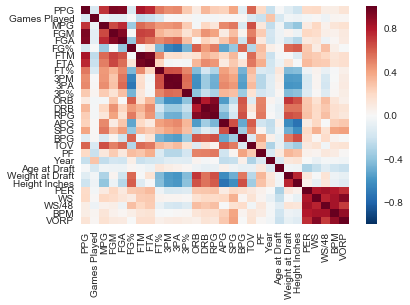

In [14]:
sns.heatmap(data.corr())

**There are a few notable features that correlate with the metrics, such as SPG, FTA, FG%, ORB, and RPG**

(array([  3.,   5.,  24.,  59.,  61.,  44.,  23.,  13.,   2.,   2.]),
 array([  4.25 ,   6.455,   8.66 ,  10.865,  13.07 ,  15.275,  17.48 ,
         19.685,  21.89 ,  24.095,  26.3  ]),
 <a list of 10 Patch objects>)

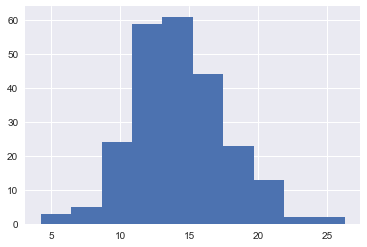

In [15]:
plt.hist(data['PER'])

**Fairly uniform distribution of PER**

(array([ 37.,  62.,  54.,  34.,  18.,  18.,   8.,   3.,   1.,   1.]),
 array([ -1.  ,   5.36,  11.72,  18.08,  24.44,  30.8 ,  37.16,  43.52,
         49.88,  56.24,  62.6 ]),
 <a list of 10 Patch objects>)

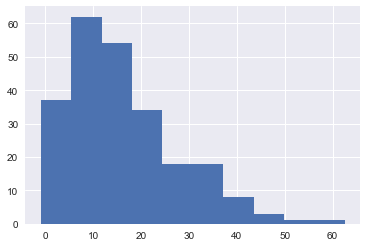

In [16]:
plt.hist(data['WS'])

**Win Shares are skewed right**

(array([  2.,   1.,   2.,  14.,  44.,  74.,  59.,  30.,   7.,   3.]),
 array([-0.09533333, -0.06306   , -0.03078667,  0.00148667,  0.03376   ,
         0.06603333,  0.09830667,  0.13058   ,  0.16285333,  0.19512667,
         0.2274    ]),
 <a list of 10 Patch objects>)

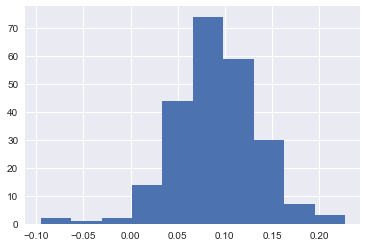

In [17]:
plt.hist(data['WS/48'])

**Win shares per 48 minutes is more uniform**

(array([  2.,   2.,   4.,  30.,  62.,  72.,  42.,  16.,   4.,   2.]),
 array([-9.925 , -8.2125, -6.5   , -4.7875, -3.075 , -1.3625,  0.35  ,
         2.0625,  3.775 ,  5.4875,  7.2   ]),
 <a list of 10 Patch objects>)

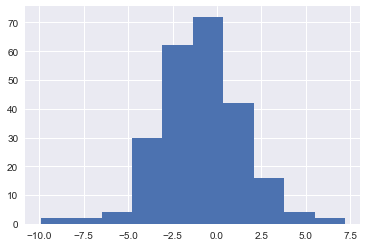

In [18]:
plt.hist(data['BPM'])

**Fairly uniform distribution of BPM**

(array([ 30.,  88.,  58.,  24.,  21.,   5.,   8.,   1.,   0.,   1.]),
 array([ -4.4 ,  -0.85,   2.7 ,   6.25,   9.8 ,  13.35,  16.9 ,  20.45,
         24.  ,  27.55,  31.1 ]),
 <a list of 10 Patch objects>)

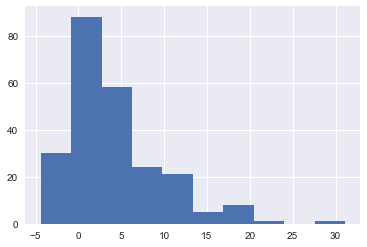

In [19]:
plt.hist(data['VORP'])

**VORP is skewed right**

(array([ 14.,  43.,  41.,  48.,  31.,  32.,  11.,  10.,   4.,   2.]),
 array([ 0.2 ,  0.46,  0.72,  0.98,  1.24,  1.5 ,  1.76,  2.02,  2.28,
         2.54,  2.8 ]),
 <a list of 10 Patch objects>)

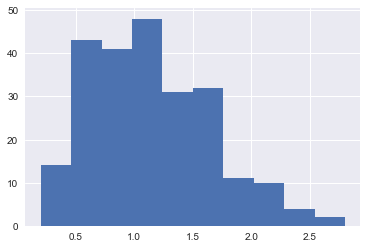

In [20]:
plt.hist(data['SPG'])

(array([ 12.,  35.,  60.,  39.,  37.,  20.,  14.,   9.,   6.,   4.]),
 array([ 1.425 ,  2.2275,  3.03  ,  3.8325,  4.635 ,  5.4375,  6.24  ,
         7.0425,  7.845 ,  8.6475,  9.45  ]),
 <a list of 10 Patch objects>)

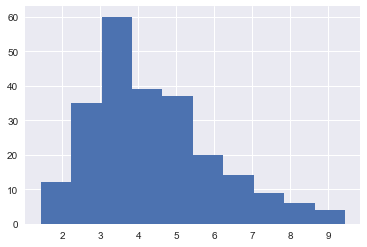

In [21]:
plt.hist(data['FTA'])

(array([ 17.,  32.,  47.,  37.,  31.,  24.,  21.,  12.,   9.,   6.]),
 array([ 0.394  ,  0.41935,  0.4447 ,  0.47005,  0.4954 ,  0.52075,
         0.5461 ,  0.57145,  0.5968 ,  0.62215,  0.6475 ]),
 <a list of 10 Patch objects>)

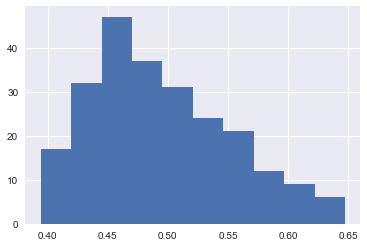

In [22]:
plt.hist(data['FG%'])

(array([ 45.,  39.,  38.,  44.,  32.,  23.,  10.,   1.,   2.,   2.]),
 array([ 0.3       ,  0.81333333,  1.32666667,  1.84      ,  2.35333333,
         2.86666667,  3.38      ,  3.89333333,  4.40666667,  4.92      ,
         5.43333333]),
 <a list of 10 Patch objects>)

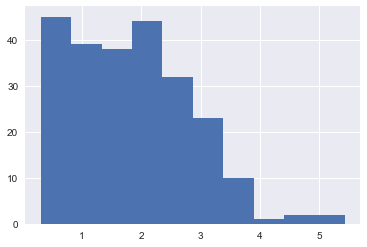

In [23]:
plt.hist(data['ORB'])

(array([ 25.,  56.,  55.,  30.,  42.,  14.,   9.,   4.,   0.,   1.]),
 array([  2.  ,   3.37,   4.74,   6.11,   7.48,   8.85,  10.22,  11.59,
         12.96,  14.33,  15.7 ]),
 <a list of 10 Patch objects>)

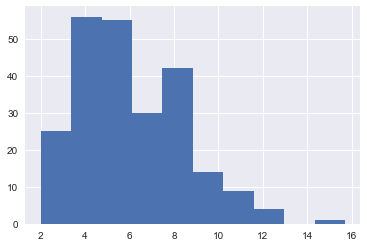

In [24]:
plt.hist(data['RPG'])

**Seems like all these statistics are right skewed, meaning there are only a few players who are above average in these categories. These players that excel at these statistics will have high target metrics that measure their performance more accurately.**

In [28]:
data['Team'].value_counts().head(9)

UNC       12
UK        11
UCLA      10
UT        10
UConn     10
KU         9
DUKE       9
U of A     7
UF         7
Name: Team, dtype: int64

In [43]:
data.loc[data['Team'] == 'UF','PER'].describe()

count     7.000000
mean     16.197143
std       2.555450
min      11.260000
25%      15.450000
50%      16.440000
75%      17.910000
max      18.960000
Name: PER, dtype: float64

In [30]:
data['PER'].describe()

count    236.000000
mean      14.292083
std        3.485483
min        4.250000
25%       12.075000
50%       14.010000
75%       16.450000
max       26.300000
Name: PER, dtype: float64

In [85]:
data.loc[data['Team'] == 'DUKE','VORP'].describe()

count     9.000000
mean      2.766667
std       5.211766
min      -2.300000
25%      -1.500000
50%       2.600000
75%       3.500000
max      13.400000
Name: VORP, dtype: float64

In [76]:
data['VORP'].describe()

count    2.360000e+02
mean     3.969915e+00
std      5.471775e+00
min     -4.400000e+00
25%     -1.387779e-17
50%      2.650000e+00
75%      6.400000e+00
max      3.110000e+01
Name: VORP, dtype: float64

* Schools that have PER higher than average are UK, UF, and UConn

* Schools that have Win Shares higher than average are UK, UCLA, UConn, and UF

* Schools that have Win Shares per 48 higher than average are UK, UNC, and UF

* Schools that have BPM higher than average are UK, UCLA, and UF

* Schools that have VORP higher than average are UK, UCLA, and UF

**Seems that UK, UCLA, and UF produce above average talent. We can create a dummy variable that separates these three schools**

In [86]:
data['TopSchool'] = data['Team'].apply(lambda x: 1 if x == 'UK' else 1 if x == 'UCLA' else 1 if x == 'UF' else 0)

**We will begin modelling with default regression models, and no feature selection methods, and test out the target metrics combined through normalization and dimensionality reduction**

**Again, the target metrics we are interested in are:**
* Overall skill - PER, WS, WS/48, BPM, VORP
* Offensive - eFG%, TS%, FTr, Usage, ORB%, OWS
* Defensive - DRB%, DWS, DBPM
* Try everything

In [91]:
target[['Name','PER','WS','WS/48','BPM','VORP']].head()

,Name,PER,WS,WS/48,BPM,VORP
0,A.J. Price,11.66,4.4,0.0440,-2.98,-0.3
1,Aaron Gray,12.82,5.5,0.0952,-1.32,0.3
2,Aaron Mckie,11.76,13.8,0.0898,-0.04,3.7
3,Adam Keefe,13.24,15.7,0.1190,-0.54,2.9
4,Adonal Foyle,11.74,4.8,0.0388,-2.08,0.2


**Use unity-based normalization**

In [6]:
def normal(series):
    mini = series.min()
    maxi = series.max()
    return (series - mini)/(maxi - mini)

In [103]:
test = target[['PER','WS','WS/48','BPM','VORP']].apply(normal)

In [98]:
test.head()

,PER,WS,WS/48,BPM,VORP
0,0.395012,0.083958,0.531904,0.538026,0.137856
1,0.441673,0.100450,0.662583,0.610373,0.150985
2,0.399035,0.224888,0.648800,0.666158,0.225383
3,0.458568,0.253373,0.723328,0.644367,0.207877
4,0.398230,0.089955,0.518632,0.577250,0.148796


**Here we have the normalized values of the five metrics, we can add them up to a single sum to be our target variable**

In [104]:
test['Total'] = test['PER'] + test['WS'] + test['WS/48'] + test['BPM'] + test['VORP']

In [371]:
test['TotalPERWS'] = test['PER'] + test['WS']

In [372]:
test['TotalPERWSBPM'] = test['PER'] + test['WS'] + test['BPM']

In [373]:
test['TotalWSBPM'] = test['WS'] + test['BPM']

In [374]:
test['TotalWSBPMV'] = test['WS'] + test['BPM'] + test['VORP']

In [375]:
test['PERVORP'] = test['PER'] + test['VORP']

In [376]:
test['TotalWV'] = test['WS'] + test['VORP']

In [129]:
test['TotalWS'] = test['PER'] + test['WS'] + test['BPM'] + test['VORP']

In [130]:
test['TotalWS48'] = test['PER'] + test['WS/48'] + test['BPM'] + test['VORP']

In [377]:
test1 = test.merge(pd.DataFrame(target['Name']), left_index = True, right_index = True)

In [378]:
test1.to_csv('normalizedtest.csv', index = False)

** We will add this column to our input dataframe**

In [134]:
data1 = data.merge(test1[['Name','Total','TotalWS','TotalWS48']], on = 'Name')

In [135]:
data1.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches,PER,WS,WS/48,BPM,VORP,TopSchool,Total,TotalWS,TotalWS48
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,22.5,193.0,74.0,11.66,4.4,0.0440,-2.98,-0.3,0,1.686755,1.154851,1.602797
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,22.3,280.0,85.0,12.82,5.5,0.0952,-1.32,0.3,0,1.966063,1.303480,1.865614
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,20.8,246.0,82.0,18.16,34.6,0.1580,2.52,12.3,1,3.207373,2.384504,2.670641
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,19.5,216.0,80.0,12.30,11.6,0.0652,-0.36,3.5,0,2.071892,1.485879,1.879988
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,19.7,193.0,78.0,13.72,8.9,0.0738,-2.10,0.2,0,1.962438,1.354475,1.811014


In [136]:
data1.to_csv('normalizedf.csv', index = False)

In [7]:
offense = target[['eFG%','TS%','FTr','USG%', 'ORB%','OWS']].apply(normal)

In [8]:
offense['TotalOff'] = offense['eFG%'] + offense['TS%'] + offense['FTr'] + offense['USG%'] + offense['ORB%'] + offense['OWS']

In [9]:
offense1 = offense.merge(pd.DataFrame(target['Name']), left_index = True, right_index = True)

In [10]:
offense1.to_csv('normalizedoffense.csv', index = False)

In [330]:
offensedf = data.merge(offense1[['Name','TotalOff']], on = 'Name')

In [331]:
offensedf.to_csv('normalizedoffdf.csv', index = False)

In [332]:
defense = target[['DRB%', 'DWS','DBPM']].apply(normal)

In [333]:
defense['TotalDef'] = defense['DRB%'] + defense['DWS'] + defense['DBPM']

In [334]:
defense1 = defense.merge(pd.DataFrame(target['Name']), left_index= True, right_index= True)

In [336]:
defense1.to_csv('normalizeddefense.csv', index = False)

In [337]:
defensedf = data.merge(defense1[['Name','TotalDef']], on = 'Name')

In [338]:
defensedf.to_csv('normalizeddefdf.csv', index = False)

**Using all features, even though we know that certain statistics are highly correlated with each other**

In [114]:
features = ['PPG','MPG','FGM','FGA','FG%','FTM','FTA','FT%','3PM','3PA','3P%','ORB','DRB','RPG','APG','SPG',
           'BPG','TOV','PF','Age at Draft','Weight at Draft','Height Inches']

In [115]:
x = data1[features]
y = data1['Total']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [359]:
def rundefaultmodels(x,y,xtest,ytest):
    ln = LinearRegression()
    modelln = ln.fit(x,y)
    predictionsln = modelln.predict(xtest)
    print 'Linear Regression'
    print 'Cross-validation score:', cross_val_score(modelln, x,y)
    print 'Training R^2:', modelln.score(x,y)
    print 'Test R^2:', modelln.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsln)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsln)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsln))
    print '\n'
    
    ls = LassoCV()
    modells = ls.fit(x,y)
    predictionsls = modells.predict(xtest)
    print 'Lasso Regression'
    print 'Cross-validation score:', cross_val_score(modells, x,y)
    print 'Training R^2:', modells.score(x,y)
    print 'Test R^2:', modells.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsls)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsls)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsls))
    print '\n'
    
    rg = RidgeCV()
    modelrg = rg.fit(x,y)
    predictionsrg = modelrg.predict(xtest)
    print 'Ridge Regression'
    print 'Cross-validation score:', cross_val_score(modelrg, x,y)
    print 'Training R^2:', modelrg.score(x,y)
    print 'Test R^2:', modelrg.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsrg)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsrg)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsrg))
    print '\n'
    
    knn = KNeighborsRegressor()
    modelknn = knn.fit(x,y)
    predictionsknn = modelknn.predict(xtest)
    print 'K-Nearest Neighbors Regression'
    print 'Cross-validation score:', cross_val_score(modelknn, x,y)
    print 'Training R^2:', modelknn.score(x,y)
    print 'Test R^2:', modelknn.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsknn)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsknn)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsknn))
    print '\n'
    
    dt = DecisionTreeRegressor()
    modeldt = dt.fit(x,y)
    predictionsdt = modeldt.predict(xtest)
    print 'Decision Tree Regression'
    print 'Cross-validation score:', cross_val_score(modeldt, x,y)
    print 'Training R^2:', modeldt.score(x,y)
    print 'Test R^2:', modeldt.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsdt)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsdt)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsdt))
    print '\n'
    
    rf = RandomForestRegressor()
    modelrf = rf.fit(x,y)
    predictionsrf = modelrf.predict(xtest)
    print 'Random Forest Regression'
    print 'Cross-validation score:', cross_val_score(modelrf, x,y)
    print 'Training R^2:', modelrf.score(x,y)
    print 'Test R^2:', modelrf.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsrf)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsrf)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsrf))
    print '\n'
    
    et = ExtraTreesRegressor()
    modelet = et.fit(x,y)
    predictionset = modelet.predict(xtest)
    print 'Extra Trees Regression'
    print 'Cross-validation score:', cross_val_score(modelet, x,y)
    print 'Training R^2:', modelet.score(x,y)
    print 'Test R^2:', modelet.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionset)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionset)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionset))
    print '\n'
    
    ada = AdaBoostRegressor()
    modelada = ada.fit(x,y)
    predictionsada = modelada.predict(xtest)
    print 'AdaBoost Regression'
    print 'Cross-validation score:', cross_val_score(modelada, x,y)
    print 'Training R^2:', modelada.score(x,y)
    print 'Test R^2:', modelada.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsada)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsada)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsada))
    print '\n'
    
    gb = GradientBoostingRegressor()
    modelgb = gb.fit(x,y)
    predictionsgb = modelgb.predict(xtest)
    print 'GradientBoost Regression'
    print 'Cross-validation score:', cross_val_score(modelgb, x,y)
    print 'Training R^2:', modelgb.score(x,y)
    print 'Test R^2:', modelgb.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsgb)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsgb)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsgb))
    print '\n'
    
    bag = BaggingRegressor()
    modelbag = bag.fit(x,y)
    predictionsbag = modelbag.predict(xtest)
    print 'Bagging Regression'
    print 'Cross-validation score:', cross_val_score(modelbag, x,y)
    print 'Training R^2:', modelbag.score(x,y)
    print 'Test R^2:', modelbag.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsbag)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsbag)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsbag))
    print '\n'
    
    xgb = XGBRegressor()
    modelxgb = xgb.fit(x,y)
    predictionsxgb = modelxgb.predict(xtest)
    print 'XGBoost Regression'
    print 'Cross-validation score:', cross_val_score(modelxgb, x,y)
    print 'Training R^2:', modelxgb.score(x,y)
    print 'Test R^2:', modelxgb.score(xtest,ytest)
    print 'MAE:', metrics.mean_absolute_error(ytest, predictionsxgb)
    print 'MSE:', metrics.mean_squared_error(ytest, predictionsxgb)
    print 'RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictionsxgb))
    print '\n'

In [360]:
rundefaultmodels(x_train, y_train, x_test, y_test)

Linear Regression
Cross-validation score: [ 0.27124845  0.28167111  0.06719888]
Training R^2: 0.478415224824
Test R^2: 0.0903693650982
MAE: 0.362708438567
MSE: 0.221251086383
RMSE: 0.470373347866


Lasso Regression
Cross-validation score: [ 0.26528949  0.07343487  0.12855879]
Training R^2: 0.42794249747
Test R^2: 0.104176209317
MAE: 0.356592272698
MSE: 0.217892822967
RMSE: 0.466789913095


Ridge Regression
Cross-validation score: [ 0.2693659   0.32260668  0.06278256]
Training R^2: 0.465799772561
Test R^2: 0.0817853748368
MAE: 0.363069523227
MSE: 0.223338985688
RMSE: 0.472587542883


K-Nearest Neighbors Regression
Cross-validation score: [-0.15294024 -0.07153712 -0.03371287]
Training R^2: 0.324690359012
Test R^2: -0.30864379341
MAE: 0.422341272788
MSE: 0.318303770641
RMSE: 0.564184163763


Decision Tree Regression
Cross-validation score: [-1.77345653 -0.32334049 -0.6513563 ]
Training R^2: 1.0
Test R^2: -1.72419209687
MAE: 0.630124081362
MSE: 0.662610116482
RMSE: 0.814008671012


Random 

**Nothing of interest with just default parameters. We will try taking out one of the win share targets since they are correlated. We will try feature selection techniques before changing model parameters**

In [137]:
x1 = data1[features]
y1 = data1['TotalWS']

In [138]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size = 0.3)

In [361]:
rundefaultmodels(x_train1, y_train1, x_test1, y_test1)

Linear Regression
Cross-validation score: [ 0.22998997 -3.97999078  0.10492579]
Training R^2: 0.449901118528
Test R^2: 0.311651283145
MAE: 0.33959643779
MSE: 0.173002724491
RMSE: 0.415935962007


Lasso Regression
Cross-validation score: [ 0.18161155 -0.21026646  0.24766219]
Training R^2: 0.355000283506
Test R^2: 0.264451228542
MAE: 0.357207174089
MSE: 0.184865517059
RMSE: 0.429959901687


Ridge Regression
Cross-validation score: [ 0.24681985  0.05341724  0.21367503]
Training R^2: 0.437548456486
Test R^2: 0.324990930882
MAE: 0.338894884907
MSE: 0.169650070021
RMSE: 0.411885991533


K-Nearest Neighbors Regression
Cross-validation score: [-0.20652665  0.07838932 -0.07117381]
Training R^2: 0.320323234806
Test R^2: -0.205206075501
MAE: 0.42936143722
MSE: 0.302904515588
RMSE: 0.550367618586


Decision Tree Regression
Cross-validation score: [-0.2298832  -0.7051972  -0.49827896]
Training R^2: 0.999999999023
Test R^2: -0.585951812658
MAE: 0.464171874487
MSE: 0.398597364654
RMSE: 0.631345677624

In [262]:
rf1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, criterion = 'mse', max_depth= 20, min_samples_leaf= 10,
                           min_impurity_split = 0.000001)
rf1.fit(x_train1, y_train1)
print rf1.score(x_train1, y_train1)
print rf1.score(x_test1, y_test1)

0.456611083935
0.194141177624


In [313]:
xgr1 = XGBRegressor(n_estimators=500, min_child_weight=4, gamma = 0.2, max_delta_step=1)
gsxgr1 = GridSearchCV(xgr1, param_grid={})
gsxgr1.fit(x_train1, y_train1)
gsxgr1.best_estimator_.fit(x_train1, y_train1)
print gsxgr1.best_estimator_.score(x_train1, y_train1)
print gsxgr1.best_estimator_.score(x_test1, y_test1)

0.814909786344
0.163851860301


**Results are much better, will try with WS/48**

In [140]:
x2 = data1[features]
y2 = data1['TotalWS48']

In [141]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size = 0.3)

In [362]:
rundefaultmodels(x_train2, y_train2, x_test2, y_test2)

Linear Regression
Cross-validation score: [ 0.10710213  0.15606626  0.01894054]
Training R^2: 0.453988777254
Test R^2: 0.249875942729
MAE: 0.305812903249
MSE: 0.14730264224
RMSE: 0.38380026347


Lasso Regression
Cross-validation score: [ 0.17037567  0.20951368  0.06612992]
Training R^2: 0.367468610162
Test R^2: 0.270357063378
MAE: 0.298519982421
MSE: 0.14328074325
RMSE: 0.378524428869


Ridge Regression
Cross-validation score: [ 0.25454116  0.19889664  0.20252371]
Training R^2: 0.440974506713
Test R^2: 0.287589822494
MAE: 0.298121089296
MSE: 0.139896728398
RMSE: 0.374027710736


K-Nearest Neighbors Regression
Cross-validation score: [ 0.02124998 -0.05335631 -0.21732657]
Training R^2: 0.227246109405
Test R^2: -0.034089816803
MAE: 0.33664839323
MSE: 0.203065294136
RMSE: 0.450627666856


Decision Tree Regression
Cross-validation score: [-0.77492332 -1.3494114  -0.44306568]
Training R^2: 0.999999995877
Test R^2: -1.27766840618
MAE: 0.501904484487
MSE: 0.447268116685
RMSE: 0.668781067828




**Seems like including WS did better overall, but we still need to tune the tree and ensemble models to prevent overfitting before we can make a conclusion**

**We will also test with PCA targets**

In [143]:
pcatest = pd.read_csv('/Users/mattlee/GA-Capstone-Project/pcatest.csv')
pcatest.head()

,PER,WS,WS/48,BPM,VORP,Total,TotalWS,TotalWS48,Name,TotalPCAWS,TotalPCAWS48
0,0.395012,0.083958,0.531904,0.538026,0.137856,1.686755,1.154851,1.602797,A.J. Price,-0.222778,-0.178794
1,0.441673,0.100450,0.662583,0.610373,0.150985,1.966063,1.303480,1.865614,Aaron Gray,-0.155401,-0.050713
2,0.399035,0.224888,0.648800,0.666158,0.225383,2.164264,1.515463,1.939376,Aaron Mckie,-0.040903,-0.019673
3,0.458568,0.253373,0.723328,0.644367,0.207877,2.287514,1.564186,2.034141,Adam Keefe,-0.010397,0.030822
4,0.398230,0.089955,0.518632,0.577250,0.148796,1.732864,1.214232,1.642908,Adonal Foyle,-0.197064,-0.159620


In [144]:
data2 = data1.merge(pcatest[['Name', 'TotalPCAWS','TotalPCAWS48']], on = 'Name', how = 'left')

In [146]:
x3 = data2[features]
y3 = data2['TotalPCAWS']

In [147]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,test_size = 0.3)

In [363]:
rundefaultmodels(x_train3, y_train3, x_test3, y_test3)

Linear Regression
Cross-validation score: [ 0.29302254  0.29888875  0.4236072 ]
Training R^2: 0.517378639333
Test R^2: 0.203786473254
MAE: 0.194619849213
MSE: 0.0623858630651
RMSE: 0.249771621817


Lasso Regression
Cross-validation score: [ 0.3122424   0.43721605  0.36518297]
Training R^2: 0.502172718349
Test R^2: 0.184490815052
MAE: 0.195729889232
MSE: 0.0638977392766
RMSE: 0.252780021514


Ridge Regression
Cross-validation score: [ 0.31531114  0.43490681  0.36612739]
Training R^2: 0.500133962464
Test R^2: 0.179763056996
MAE: 0.196439942078
MSE: 0.0642681741622
RMSE: 0.253511684469


K-Nearest Neighbors Regression
Cross-validation score: [ 0.07279543  0.02653404 -0.09917394]
Training R^2: 0.334773863844
Test R^2: -0.100475157756
MAE: 0.226884116237
MSE: 0.086225729898
RMSE: 0.293642180039


Decision Tree Regression
Cross-validation score: [-0.70559525 -0.99991279 -1.44797095]
Training R^2: 0.999999992039
Test R^2: -0.537788756665
MAE: 0.266369759957
MSE: 0.120490641736
RMSE: 0.3471176

In [149]:
x4 = data2[features]
y4 = data2['TotalPCAWS48']

In [150]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4,y4,test_size = 0.3)

In [364]:
rundefaultmodels(x_train4,y_train4,x_test4,y_test4)

Linear Regression
Cross-validation score: [-0.16068663  0.2019638   0.45733681]
Training R^2: 0.483905047852
Test R^2: -0.0739114137987
MAE: 0.152053954054
MSE: 0.0390910048581
RMSE: 0.197714452831


Lasso Regression
Cross-validation score: [ 0.12312063  0.1589859   0.04707754]
Training R^2: 0.434867784487
Test R^2: 0.0936733978956
MAE: 0.137755157951
MSE: 0.0329908194947
RMSE: 0.181633750979


Ridge Regression
Cross-validation score: [ 0.07509643  0.17012823  0.41958647]
Training R^2: 0.458784534697
Test R^2: 0.0755440190684
MAE: 0.140119660912
MSE: 0.0336507395092
RMSE: 0.183441378945


K-Nearest Neighbors Regression
Cross-validation score: [-0.35037574 -0.20900971 -0.08382386]
Training R^2: 0.292308031526
Test R^2: -0.135839019994
MAE: 0.160347584546
MSE: 0.041345206018
RMSE: 0.203335206047


Decision Tree Regression
Cross-validation score: [-0.69132156 -0.3204127  -0.90960118]
Training R^2: 0.999999974537
Test R^2: -0.298357293448
MAE: 0.161563221126
MSE: 0.0472609664201
RMSE: 0.21

**Looks like normalized targets did better and Win Shares seems better for the model than Win Shares per 48 with default models**

In [339]:
data3 = data2.merge(offense1[['Name','TotalOff']], on = 'Name')
data4 = data3.merge(defense1[['Name','TotalDef']], on = 'Name')
data4.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches,PER,WS,WS/48,BPM,VORP,TopSchool,Total,TotalWS,TotalWS48,TotalPCAWS,TotalPCAWS48,TotalOff,TotalDef
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,22.5,193.0,74.0,11.66,4.4,0.0440,-2.98,-0.3,0,1.686755,1.154851,1.602797,-0.222778,-0.178794,1.545085,0.672569
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,22.3,280.0,85.0,12.82,5.5,0.0952,-1.32,0.3,0,1.966063,1.303480,1.865614,-0.155401,-0.050713,2.490563,1.537938
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,20.8,246.0,82.0,18.16,34.6,0.1580,2.52,12.3,1,3.207373,2.384504,2.670641,0.411597,0.352678,2.423414,1.949977
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,19.5,216.0,80.0,12.30,11.6,0.0652,-0.36,3.5,0,2.071892,1.485879,1.879988,-0.058963,-0.045261,1.831858,1.621651
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,19.7,193.0,78.0,13.72,8.9,0.0738,-2.10,0.2,0,1.962438,1.354475,1.811014,-0.119639,-0.072433,2.119826,0.824115


In [340]:
x5 = data4[features]
y5 = data4['TotalOff']

In [341]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5, test_size = 0.3)

In [365]:
rundefaultmodels(x_train5, y_train5, x_test5, y_test5)

Linear Regression
Cross-validation score: [ 0.16703379  0.55070764  0.36409867]
Training R^2: 0.56267565639
Test R^2: 0.43491948074
MAE: 0.245528163751
MSE: 0.0915269847137
RMSE: 0.302534270313


Lasso Regression
Cross-validation score: [ 0.19639496  0.47769652  0.42295918]
Training R^2: 0.490261915747
Test R^2: 0.415151364325
MAE: 0.246683450454
MSE: 0.0947288577694
RMSE: 0.307780535072


Ridge Regression
Cross-validation score: [ 0.19465163  0.53375085  0.36923749]
Training R^2: 0.510264755309
Test R^2: 0.389767088817
MAE: 0.248446337583
MSE: 0.0988403889887
RMSE: 0.314388913591


K-Nearest Neighbors Regression
Cross-validation score: [-0.10788473  0.06234261  0.16977669]
Training R^2: 0.45167230371
Test R^2: 0.304032717806
MAE: 0.269849572771
MSE: 0.112726920549
RMSE: 0.335748299399


Decision Tree Regression
Cross-validation score: [-0.88746511 -0.286176    0.15026099]
Training R^2: 0.999999999757
Test R^2: -0.23327807641
MAE: 0.335265491323
MSE: 0.199755999012
RMSE: 0.446940710847

**Better results with predicting offensive metric**

In [343]:
x6 = data4[features]
y6 = data4['TotalDef']

In [344]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(x6,y6, test_size = 0.3)

In [366]:
rundefaultmodels(x_train6, y_train6, x_test6, y_test6)

Linear Regression
Cross-validation score: [ 0.57518281  0.61271229  0.61291472]
Training R^2: 0.710294948769
Test R^2: 0.669554588097
MAE: 0.168425456984
MSE: 0.0487785046075
RMSE: 0.22085856245


Lasso Regression
Cross-validation score: [ 0.5890526   0.57517493  0.6125764 ]
Training R^2: 0.673278727699
Test R^2: 0.700916584017
MAE: 0.158748450591
MSE: 0.0441490220746
RMSE: 0.210116686807


Ridge Regression
Cross-validation score: [ 0.60180375  0.56730913  0.6206612 ]
Training R^2: 0.705697047065
Test R^2: 0.675684688132
MAE: 0.167756967292
MSE: 0.0478736135058
RMSE: 0.218800396494


K-Nearest Neighbors Regression
Cross-validation score: [ 0.13266774  0.39165676  0.33519676]
Training R^2: 0.550845722483
Test R^2: 0.538668713998
MAE: 0.203594634843
MSE: 0.0680991457265
RMSE: 0.260958130217


Decision Tree Regression
Cross-validation score: [-0.47863643  0.03870645  0.38377027]
Training R^2: 0.999999985981
Test R^2: 0.0348671619047
MAE: 0.288504235423
MSE: 0.142467514736
RMSE: 0.37744869

**Good results with defensive metrics as well**

**We will try to see if single target metrics perform better**

In [367]:
xper = data4[features]
yper = data4['PER']

In [369]:
x_trainper, x_testper, y_trainper, y_testper = train_test_split(xper,yper,test_size = 0.3)

In [370]:
rundefaultmodels(x_trainper, y_trainper, x_testper, y_testper)

Linear Regression
Cross-validation score: [-1.1378714   0.33243148  0.2137813 ]
Training R^2: 0.490202137224
Test R^2: 0.00548139752509
MAE: 2.38591134852
MSE: 9.2520957836
RMSE: 3.04172579034


Lasso Regression
Cross-validation score: [ 0.21529915  0.3055426   0.19715075]
Training R^2: 0.438375806722
Test R^2: 0.00290572698483
MAE: 2.27823345499
MSE: 9.27605747771
RMSE: 3.04566207543


Ridge Regression
Cross-validation score: [ 0.22348361  0.34962928  0.18092971]
Training R^2: 0.449932020551
Test R^2: 0.0333732296801
MAE: 2.23522092675
MSE: 8.9926155667
RMSE: 2.99876900856


K-Nearest Neighbors Regression
Cross-validation score: [ 0.11076612 -0.14246288  0.00122279]
Training R^2: 0.343126786704
Test R^2: -0.223527177708
MAE: 2.68170892019
MSE: 11.3825831049
RMSE: 3.37380839777


Decision Tree Regression
Cross-validation score: [-2.03071035 -0.11893985 -0.18984931]
Training R^2: 1.0
Test R^2: -1.10575154878
MAE: 3.38307511737
MSE: 19.589995579
RMSE: 4.42605869584


Random Forest Regres

In [381]:
data5 = data4.merge(test1[['Name','TotalPERWS','TotalPERWSBPM','TotalWSBPM','TotalWSBPMV','PERVORP','TotalWV']],
                   on = 'Name')

In [403]:
data5.to_csv('normdfedit.csv',index = False)

In [400]:
x7 = data5[features]
y7 = data5['TotalPERWS']

In [401]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(x7,y7,test_size = 0.3)

In [402]:
rundefaultmodels(x_train7,y_train7,x_test7,y_test7)

Linear Regression
Cross-validation score: [ 0.10750829  0.22108636 -0.38603256]
Training R^2: 0.457008499792
Test R^2: 0.235149826954
MAE: 0.200997607542
MSE: 0.0679645245664
RMSE: 0.260700066295


Lasso Regression
Cross-validation score: [ 0.20995261  0.20392838 -0.16217317]
Training R^2: 0.409752553117
Test R^2: 0.221284940169
MAE: 0.19901531924
MSE: 0.0691965572857
RMSE: 0.26305238506


Ridge Regression
Cross-validation score: [ 0.13201511  0.2607708  -0.21256292]
Training R^2: 0.4396457976
Test R^2: 0.259735740441
MAE: 0.196811529245
MSE: 0.0657798222808
RMSE: 0.256475773282


K-Nearest Neighbors Regression
Cross-validation score: [-0.05079784 -0.08531785 -0.80350582]
Training R^2: 0.280139494195
Test R^2: -0.235506827277
MAE: 0.255307728219
MSE: 0.109787036826
RMSE: 0.331341269428


Decision Tree Regression
Cross-validation score: [-0.42434802 -0.13470463 -2.02881719]
Training R^2: 1.0
Test R^2: -0.500463928258
MAE: 0.282572069319
MSE: 0.133331103407
RMSE: 0.365145318205


Random 

In [409]:
features1 = ['PPG','MPG','FGM','FG%','FTM','FT%','3PM','3P%','ORB','DRB','APG','SPG',
           'BPG','TOV','PF','Age at Draft','Weight at Draft','Height Inches']

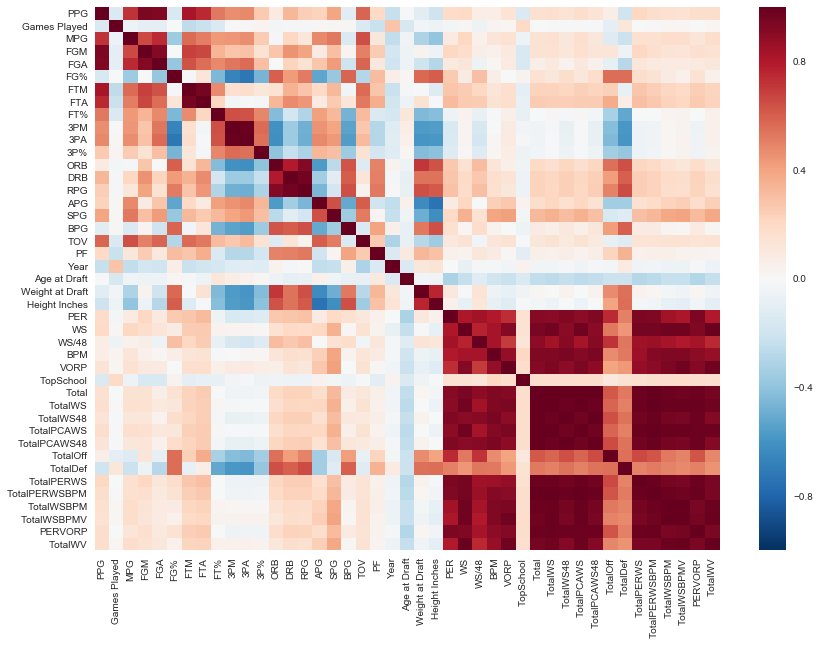

In [408]:
plt.subplots(figsize=(14,10))
sns.heatmap(data5.corr())

**We removed some features that were correlated**

In [410]:
x8 = data5[features1]
y8 = data5['TotalWS']

In [411]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(x8,y8, test_size = 0.3)

In [412]:
rundefaultmodels(x_train8, y_train8, x_test8, y_test8)

Linear Regression
Cross-validation score: [ 0.41040306  0.17530937  0.16644035]
Training R^2: 0.442401568588
Test R^2: 0.327054544932
MAE: 0.354037932908
MSE: 0.197690861936
RMSE: 0.444624405466


Lasso Regression
Cross-validation score: [ 0.18882538  0.19045104  0.07189485]
Training R^2: 0.44073258459
Test R^2: 0.321713185549
MAE: 0.356333712373
MSE: 0.199259990507
RMSE: 0.446385473002


Ridge Regression
Cross-validation score: [ 0.35244774  0.18935949  0.09095929]
Training R^2: 0.439755983503
Test R^2: 0.318690768481
MAE: 0.358753916311
MSE: 0.200147884512
RMSE: 0.447378904858


K-Nearest Neighbors Regression
Cross-validation score: [ 0.19041179 -0.04836033 -0.13544485]
Training R^2: 0.328623936581
Test R^2: -0.175599125194
MAE: 0.490689925125
MSE: 0.3453551883
RMSE: 0.587669284802


Decision Tree Regression
Cross-validation score: [ 0.00170055 -1.06362803 -1.25844345]
Training R^2: 1.0
Test R^2: -0.676621571767
MAE: 0.530841718806
MSE: 0.492540310908
RMSE: 0.701812162126


Random Fo

**We will perform further parameter tuning for overall, offense, and defense models in other notebooks.**